### **Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **I. Dataset Analysis & Understanding**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **A. Data Characteristics**

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/CSI-5810 Info Retrival/Project #1/bank-additional-full.csv', sep=';')

# Display the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.duplicated().sum()

12

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}

unique_values

{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [9]:
target_distribution = df['y'].value_counts()

target_distribution, df['y'].value_counts(normalize=True)*100

(no     36548
 yes     4640
 Name: y, dtype: int64,
 no     88.734583
 yes    11.265417
 Name: y, dtype: float64)

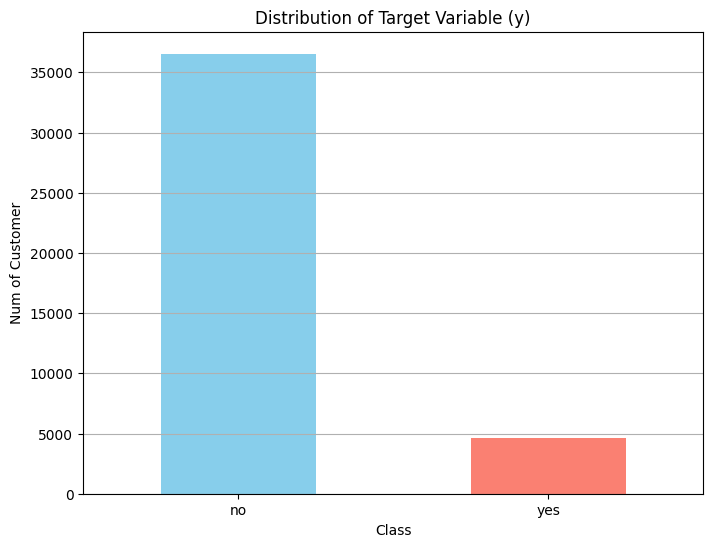

In [10]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Class')
plt.ylabel('Num of Customer')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

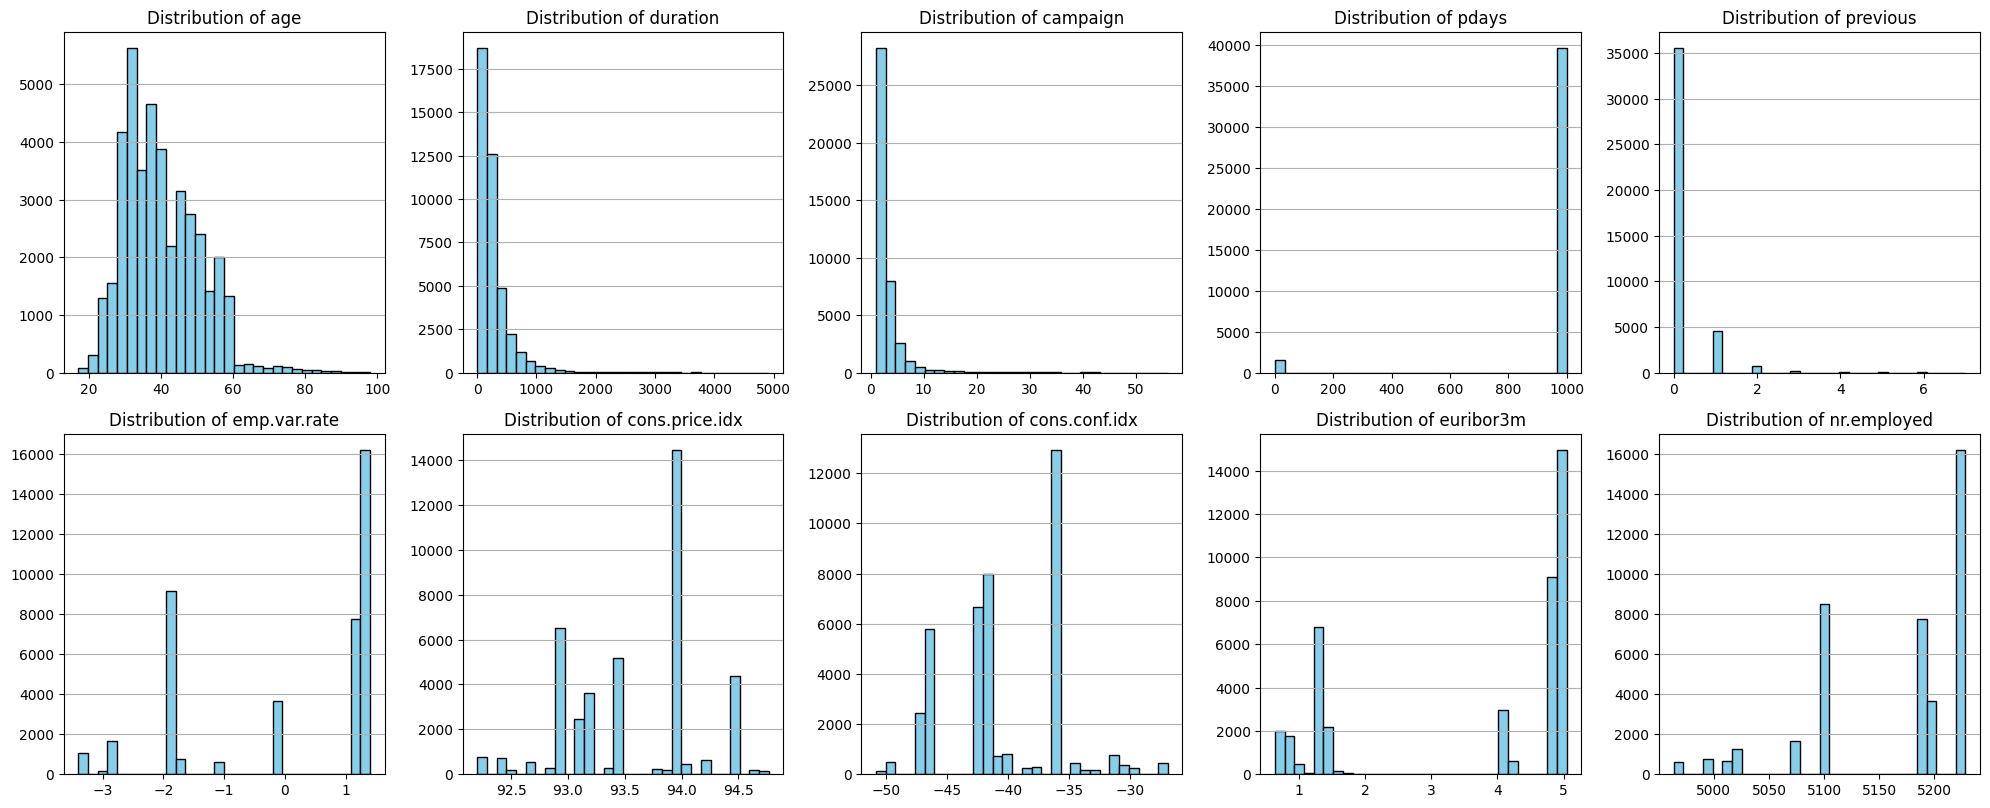

In [11]:
# Plot histograms for numeric features
plt.figure(figsize=(20, 20))
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_features)
current_plot = 1


for feature in num_features:
    plt.subplot(5, 5, current_plot)
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.grid(axis='y')
    current_plot += 1

plt.tight_layout()
plt.show()

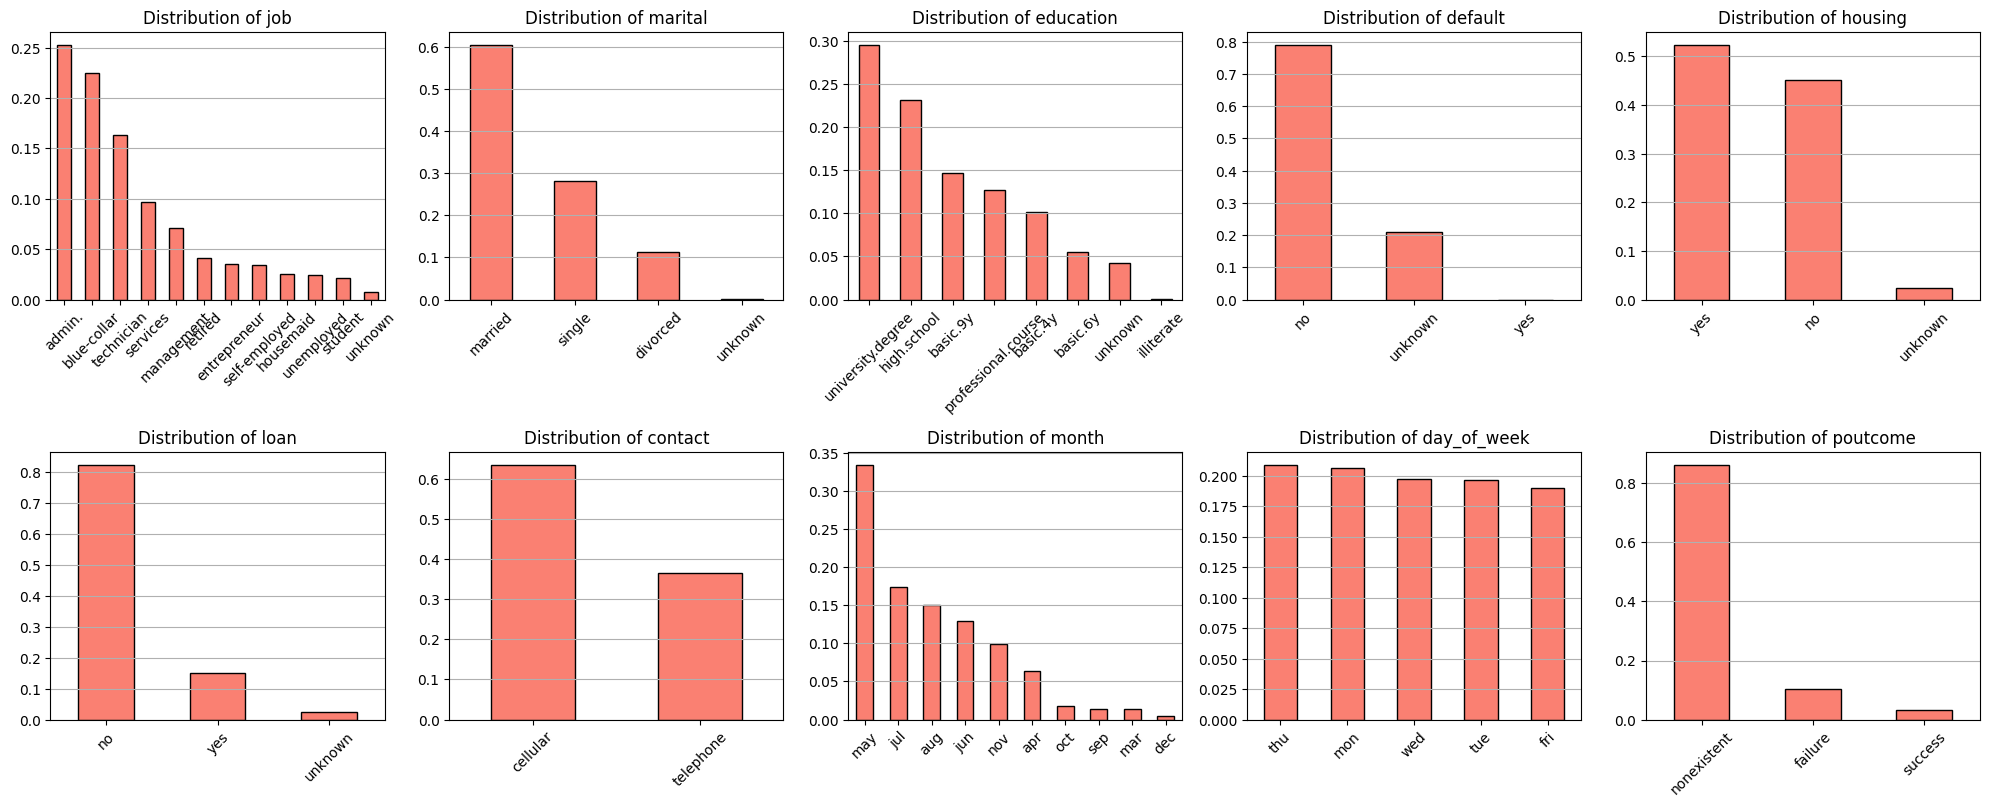

In [12]:
# Plot bar plots for categorical features
plt.figure(figsize=(20, 20))
cat_features = df.select_dtypes(include=['object']).columns
cat_features = cat_features.drop('y')  # We've already examined the target variable 'y'
num_plots = len(cat_features)
current_plot = 1


for feature in cat_features:
    plt.subplot(5, 5, current_plot)
    df[feature].value_counts(normalize=True).plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    current_plot += 1

plt.tight_layout()
plt.show()

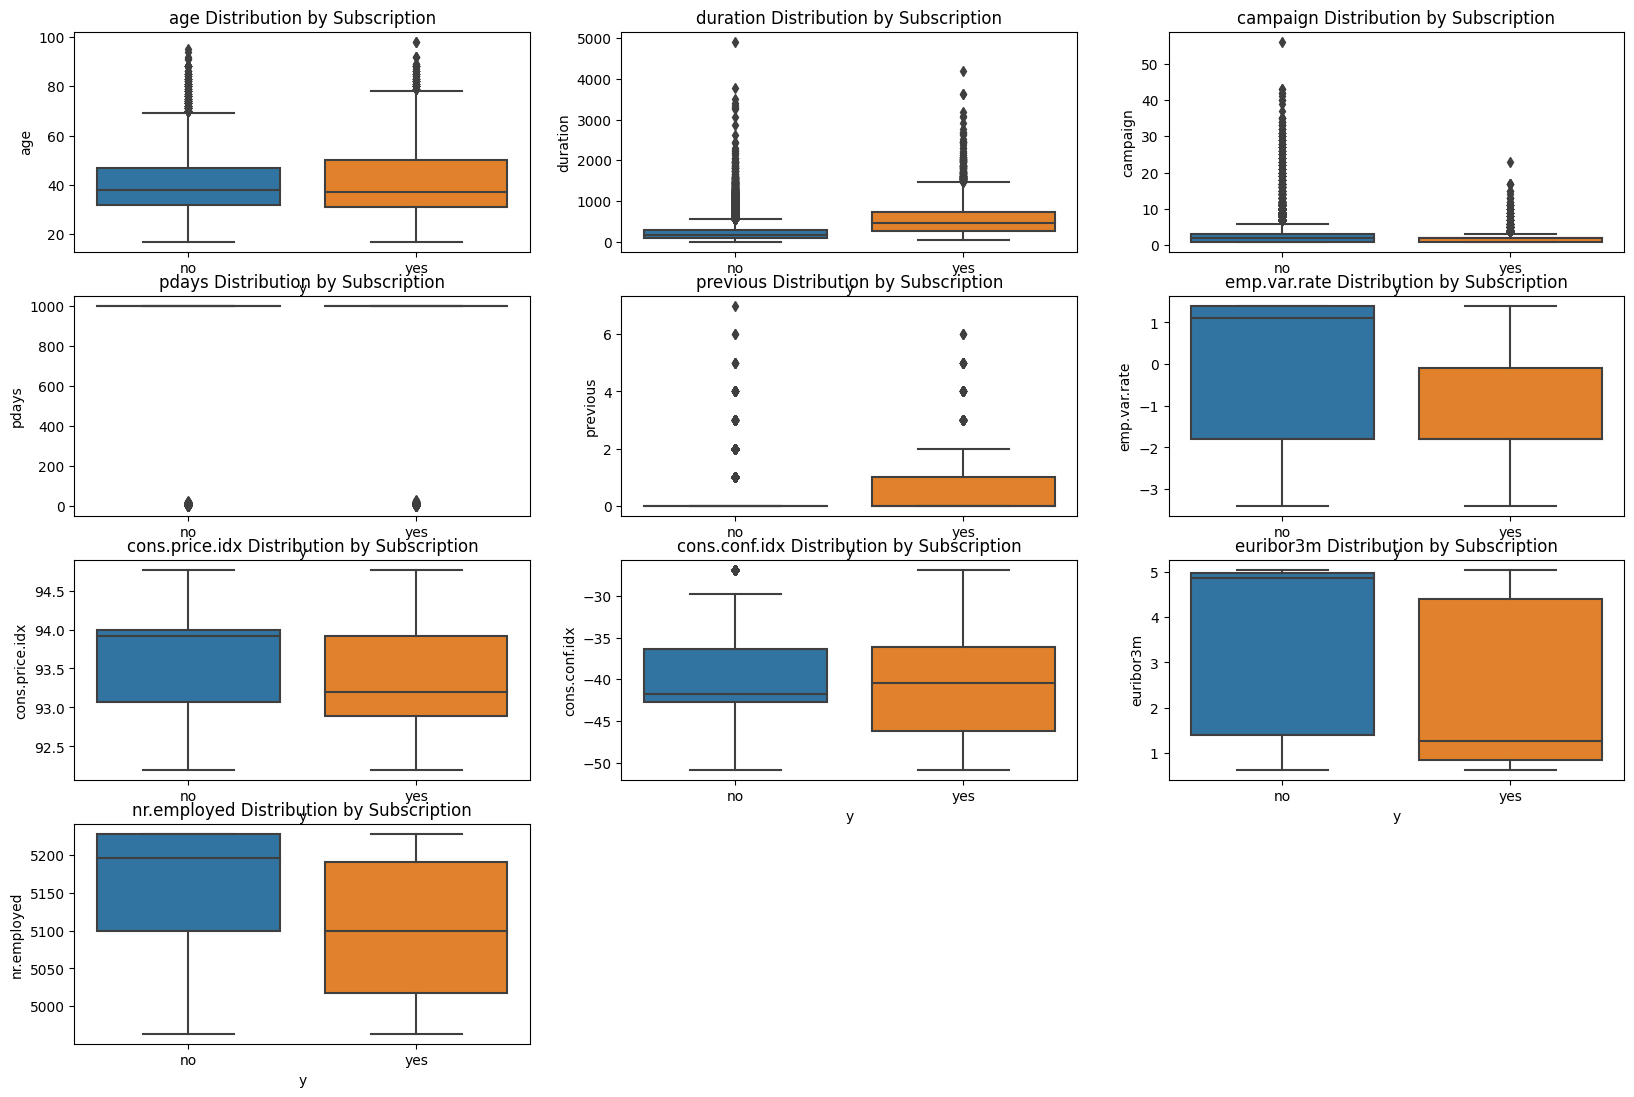

In [13]:
plt.figure(figsize=(20, 20))

for index, column in enumerate(num_features):
    plt.subplot(6, 3, index + 1)
    sns.boxplot(x='y', y=column, data=df)
    plt.title(f'{column} Distribution by Subscription')


plt.show()


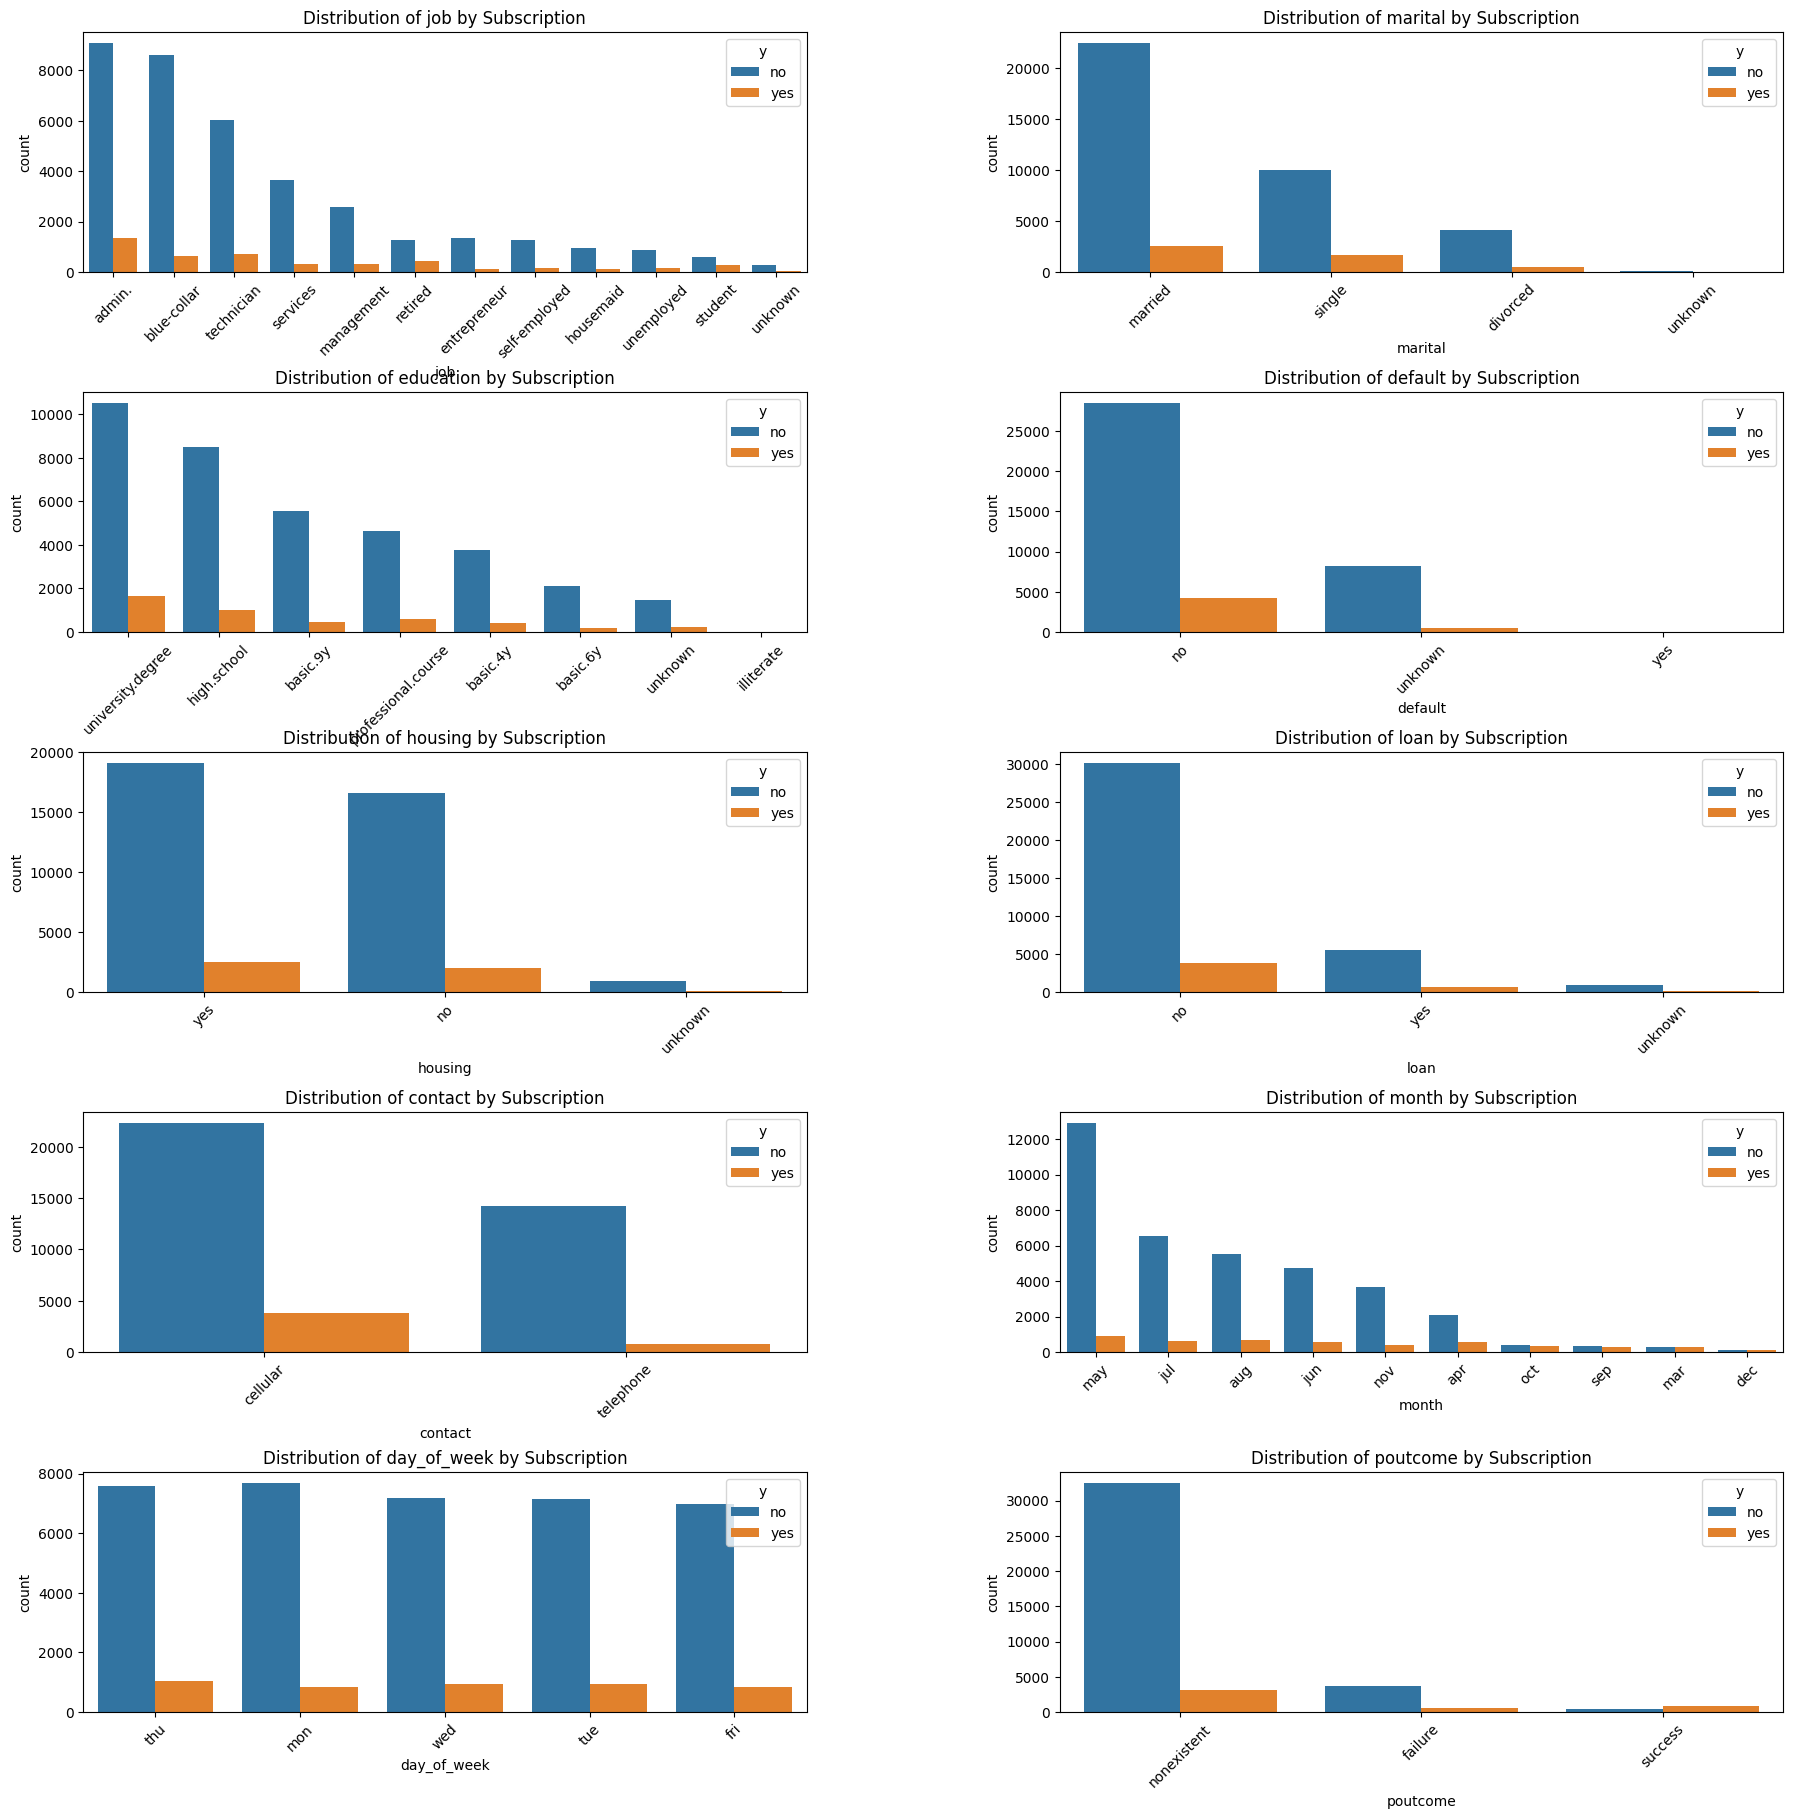

In [14]:
plt.figure(figsize=(20, 20))

for index, column in enumerate(cat_features, 1):
    plt.subplot(5, 2, index)
    ax = sns.countplot(x=column, hue="y", data=df, order = df[column].value_counts().index)
    plt.title(f'Distribution of {column} by Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.show()

## **B. Feature Analysis & Selection**

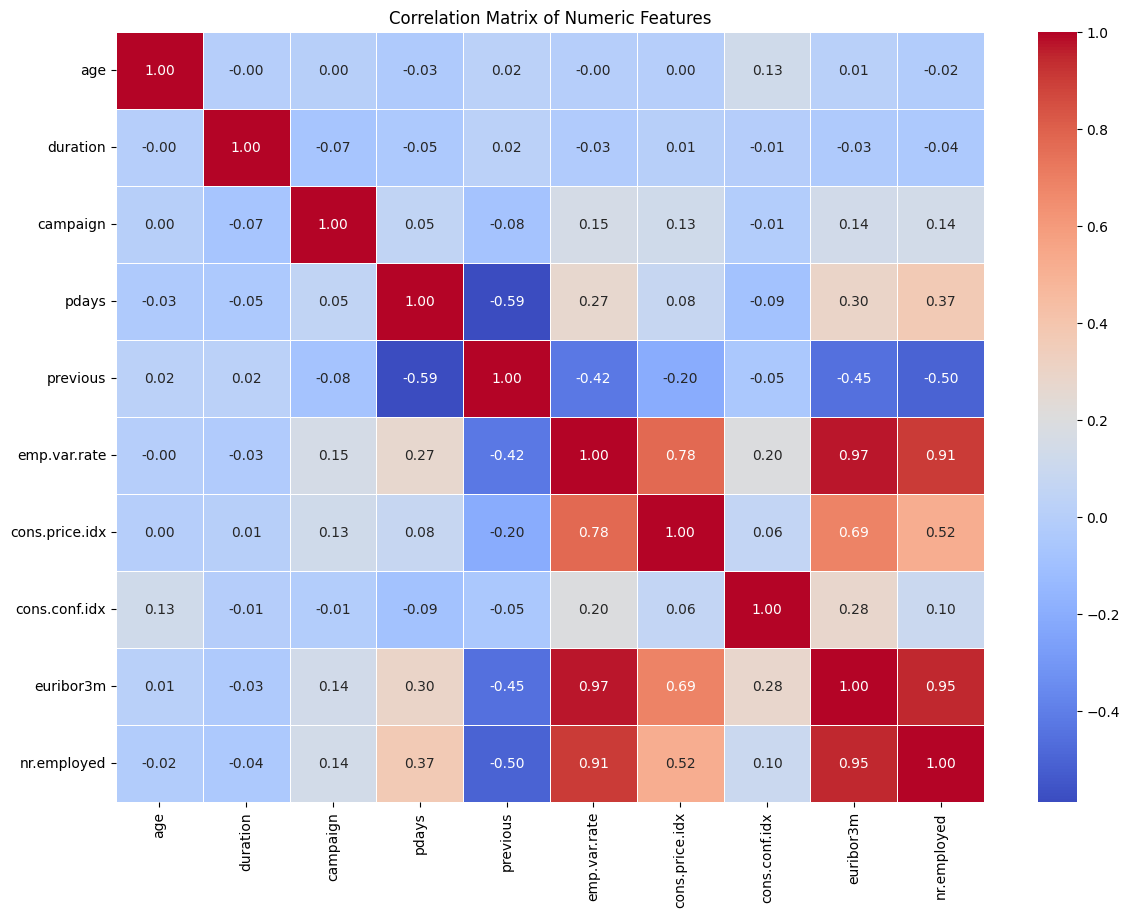

In [15]:
# Compute the correlation matrix for numeric features
correlation_matrix = df[num_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [16]:
df1 = df.copy()

In [17]:
# Drop 12 duplicated values
df1_clean = df1.drop_duplicates()

In [18]:
# Replace 'unknown' as Nan
for i in df1.columns:
    df1_clean[i] = np.where(df1_clean[i] == "unknown", np.nan, df1_clean[i])
df1_clean.isna().sum()

<ipython-input-18-9cd265391ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[i] = np.where(df1_clean[i] == "unknown", np.nan, df1_clean[i])


age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [19]:
# Calculate the percentage of Nans in the 'default' column
(8596/df1_clean.default.shape[0])*100

20.876238585583835

In [20]:
# Drop the 'default' feature
df1_clean.drop('default', axis=1, inplace=True)

<ipython-input-20-500338346a9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean.drop('default', axis=1, inplace=True)


## **C. Data Cleaning/Preprocessing**

In [21]:
# Calculate the percentage of Nans in the 'education' column
(1730/df1_clean.education.shape[0])*100

4.2014765883038665

In [22]:
# Calculate the percentage of Nans in the 'housing' column
(1730/df1_clean.housing.shape[0])*100

4.2014765883038665

In [23]:
varlist = ['job', 'education', 'housing', 'loan', 'marital']

for col in varlist:
    mode_value = df1_clean[col].mode()[0]
    df1_clean[col].fillna(mode_value, inplace=True)

<ipython-input-23-3467c44346ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[col].fillna(mode_value, inplace=True)
<ipython-input-23-3467c44346ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[col].fillna(mode_value, inplace=True)
<ipython-input-23-3467c44346ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[col].fillna(mode_value, inplace=True)
<ipython-input-23-3467c44346ed>:5: SettingWithCopyWa

In [24]:
df1_clean.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Next, convert categorical data to numerical data.

In [25]:
mappings = {
    'marital': {'divorced': 0, 'single': 1, 'married': 2},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'yes': 1, 'no': 0},
    'contact': {'cellular': 1, 'telephone': 0},
    'day_of_week': {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5},
    'poutcome': {'nonexistent': 0, 'failure': 1, 'success': 2},
    'y': {'yes': 1, 'no': 0},
    'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
}

# Apply the mappings using the map function
for col, mapping in mappings.items():
    df1_clean[col] = df1_clean[col].map(mapping)

<ipython-input-25-f11bd49052d6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[col] = df1_clean[col].map(mapping)
<ipython-input-25-f11bd49052d6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[col] = df1_clean[col].map(mapping)
<ipython-input-25-f11bd49052d6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [26]:
df1_clean.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,2,basic.4y,0,0,0,5,1,261.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,2,high.school,0,0,0,5,1,149.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,2,high.school,1,0,0,5,1,226.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,2,basic.6y,0,0,0,5,1,151.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,2,high.school,0,1,0,5,1,307.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


### **One-Hot Encoder**

For the remaining columns, apply one hot encoder.

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
ohe = OneHotEncoder()

encode_columns = ['job', 'education']

# Apply the one-hot encoder to the remaining categorical columns
for col in encode_columns:
    df1_clean[list(df1_clean[col].unique())] = ohe.fit_transform(df1_clean[[col]]).A
    df1_clean.drop(col, axis=1, inplace=True)

<ipython-input-28-56fc956290c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[list(df1_clean[col].unique())] = ohe.fit_transform(df1_clean[[col]]).A
<ipython-input-28-56fc956290c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[list(df1_clean[col].unique())] = ohe.fit_transform(df1_clean[[col]]).A
<ipython-input-28-56fc956290c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [29]:
df1_clean

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,self-employed,entrepreneur,student,basic.4y,high.school,basic.6y,basic.9y,professional.course,university.degree,illiterate
0,56.0,2,0,0,0,5,1,261.0,1.0,999.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,2,0,0,0,5,1,149.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.0,2,1,0,0,5,1,226.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,2,0,0,0,5,1,151.0,1.0,999.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,56.0,2,0,1,0,5,1,307.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,2,1,0,1,11,5,334.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46.0,2,0,0,1,11,5,383.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56.0,2,1,0,1,11,5,189.0,2.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41186,44.0,2,0,0,1,11,5,442.0,1.0,999.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **II. Data Transformation & Model Used**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
x = df1_clean.drop('y', axis=1)
x

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,self-employed,entrepreneur,student,basic.4y,high.school,basic.6y,basic.9y,professional.course,university.degree,illiterate
0,56.0,2,0,0,0,5,1,261.0,1.0,999.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,2,0,0,0,5,1,149.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.0,2,1,0,0,5,1,226.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,2,0,0,0,5,1,151.0,1.0,999.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,56.0,2,0,1,0,5,1,307.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,2,1,0,1,11,5,334.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,46.0,2,0,0,1,11,5,383.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,56.0,2,1,0,1,11,5,189.0,2.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41186,44.0,2,0,0,1,11,5,442.0,1.0,999.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
y = df1_clean['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state= 42)

## **Feature Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
std = StandardScaler()
num_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

x_train[num_columns] = std.fit_transform(x_train[num_columns])

x_train.head()

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,self-employed,entrepreneur,student,basic.4y,high.school,basic.6y,basic.9y,professional.course,university.degree,illiterate
12348,-1.058427,0.734511,0.904978,2.353085,-1.316322,0.189883,1.433936,0.112453,0.152155,0.195697,...,-0.145512,-0.442955,-0.156654,-0.33692,4.108861,-0.41492,-0.548072,-0.02062,-0.382175,-0.711991
8565,0.954767,-0.716017,-1.104999,-0.424974,-1.316322,-0.299610,0.014863,-0.305973,1.229538,0.195697,...,-0.145512,-0.442955,-0.156654,-0.33692,-0.243376,-0.41492,-0.548072,-0.02062,-0.382175,1.404513
21424,-1.058427,-0.716017,-1.104999,-0.424974,0.759693,0.679376,-0.694674,-0.596546,0.511282,0.195697,...,-0.145512,-0.442955,-0.156654,-0.33692,-0.243376,-0.41492,-0.548072,-0.02062,-0.382175,1.404513
3316,-0.483229,-0.716017,-1.104999,-0.424974,-1.316322,-0.789103,0.724399,-0.472568,-0.566100,0.195697,...,-0.145512,-0.442955,-0.156654,-0.33692,-0.243376,-0.41492,-0.548072,-0.02062,-0.382175,1.404513
33246,-0.003897,-0.716017,-1.104999,-0.424974,0.759693,-0.789103,-0.694674,0.623862,-0.566100,0.195697,...,-0.145512,-0.442955,-0.156654,-0.33692,-0.243376,-0.41492,1.824578,-0.02062,-0.382175,-0.711991


In [36]:
# Scaling the testing data
x_test[num_columns] = std.fit_transform(x_test[num_columns])

## **Apply PCA**

In [37]:
from sklearn.decomposition import PCA

In [47]:
economic_features = ['cons.price.idx', 'nr.employed', 'euribor3m']
X_economic = x_train[economic_features]

pca = PCA(n_components=0.95)

X_economic_pca = pca.fit_transform(X_economic)

pca_columns = ['PCA' + str(i) for i in range(X_economic_pca.shape[1])]
X_economic_pca_df = pd.DataFrame(X_economic_pca, columns=pca_columns, index=x_train.index)

x_train_pca = x_train.drop(economic_features, axis=1)
x_train_pca = pd.concat([x_train_pca, X_economic_pca_df], axis=1)

In [48]:
x_train_pca.isna().sum()

age                    0
marital                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.conf.idx          0
housemaid              0
services               0
admin.                 0
blue-collar            0
technician             0
retired                0
management             0
unemployed             0
self-employed          0
entrepreneur           0
student                0
basic.4y               0
high.school            0
basic.6y               0
basic.9y               0
professional.course    0
university.degree      0
illiterate             0
PCA0                   0
PCA1                   0
dtype: int64

In [51]:
X_test_economic = x_test[economic_features]
X_test_economic_pca = pca.transform(X_test_economic)

X_test_economic_pca_df = pd.DataFrame(X_test_economic_pca, columns=pca_columns, index=x_test.index)

x_test_pca = x_test.drop(economic_features, axis=1)
x_test_pca = pd.concat([x_test_pca, X_test_economic_pca_df], axis=1)

In [52]:
x_test_pca.isna().sum()

age                    0
marital                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.conf.idx          0
housemaid              0
services               0
admin.                 0
blue-collar            0
technician             0
retired                0
management             0
unemployed             0
self-employed          0
entrepreneur           0
student                0
basic.4y               0
high.school            0
basic.6y               0
basic.9y               0
professional.course    0
university.degree      0
illiterate             0
PCA0                   0
PCA1                   0
dtype: int64

## **Random Forest Classifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8, class_weight='balanced')
model_rf.fit(x_train_pca,y_train)
y_pred=model_rf.predict(x_test_pca)

In [55]:
print("Accuracy: ", model_rf.score(x_test_pca, y_test))

Accuracy:  0.8311073336571151


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7265
           1       0.40      0.92      0.56       971

    accuracy                           0.83      8236
   macro avg       0.70      0.87      0.73      8236
weighted avg       0.92      0.83      0.86      8236



#### **Perform K-fold Cross Validation**

In [57]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model_rf,x_train_pca,y_train, cv=kfold)

In [58]:
print("Mean Accuracy: %.2f%%\nStandard Deviation: %.2f%%" % (scores.mean()*100, scores.std()*100))

Mean Accuracy: 84.01%
Standard Deviation: 0.49%


## **Logistic Regression Classifier**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model_lr=LogisticRegression(random_state = 10000, class_weight='balanced')
model_lr.fit(x_train_pca,y_train)
y_pred = model_lr.predict(x_test_pca)

In [61]:
print("Accuracy: ", model_lr.score(x_test_pca, y_test))

Accuracy:  0.8569694026226323


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7265
           1       0.44      0.84      0.58       971

    accuracy                           0.86      8236
   macro avg       0.71      0.85      0.75      8236
weighted avg       0.91      0.86      0.87      8236



#### **Perform K-fold Cross Validation**

In [63]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model_lr,x_train_pca,y_train, cv=kfold)

In [64]:
print("Mean Accuracy: %.2f%%\nStandard Deviation: %.2f%%" % (scores.mean()*100, scores.std()*100))

Mean Accuracy: 85.69%
Standard Deviation: 0.54%


## **Decision Tree Classifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8, class_weight='balanced')
model_dt.fit(x_train_pca, y_train)

y_pred=model_dt.predict(x_test_pca)

In [67]:
print("Accuracy: ", model_dt.score(x_test_pca, y_test))

Accuracy:  0.809009227780476


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      7265
           1       0.37      0.93      0.53       971

    accuracy                           0.81      8236
   macro avg       0.68      0.86      0.71      8236
weighted avg       0.92      0.81      0.84      8236



#### **Perform K-fold Cross Validation**

In [69]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model_dt,x_train_pca,y_train, cv=kfold)

In [70]:
print("Mean Accuracy: %.2f%%\nStandard Deviation: %.2f%%" % (scores.mean()*100, scores.std()*100))

Mean Accuracy: 83.94%
Standard Deviation: 0.65%


# **III. Experiments & Model Results**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, loguniform, uniform
from scipy.stats import randint as sp_randint

## **Random Forest Tuning**

In [87]:
param_dist_rf = {
    'n_estimators': sp_randint(5, 200),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 5),
    'min_samples_leaf': sp_randint(1, 4),
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

n_iter_search = 10
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                      n_iter=n_iter_search, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search_rf.fit(x_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b22284be0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b1c3e5810>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b1c3e4d00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b22b50130>},
                   random_state=42, verbose=2)

In [88]:
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 79}
Best Score: 0.9164845173041893


In [90]:
param_grid_rf = {
    'n_estimators': [70, 80, 90],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [True]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train_pca, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 25, 30],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [70, 80, 90]},
             verbose=2)

In [91]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 80}
Best Score: 0.9170916818457803


## **Logistic Regression Tuning**

In [94]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a Logistic Regression model
lr = LogisticRegression()

# Perform Grid Search
grid_search_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(x_train_pca, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [95]:
print("Best parameters found: ", grid_search_lr.best_params_)
print("Best score found: ", grid_search_lr.best_score_)

Best parameters found:  {'C': 0.01, 'solver': 'liblinear'}
Best score found:  0.9112629022465087


## **Decision Tree Tuning**

In [92]:
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(x_train_pca, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [93]:
print("Best parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.9121432908318153
